# Importação do dataset

In [1]:
teste = read.csv("wine.data",sep = ",")

colnames(teste) = c("class", "alcohol","malic acid","ash","alcalinity of ash", "magnesium","total phenols","flavanoids","nonflavanoid phenols","proanthocyanins","color intensity","hue","ratio of diluted wines","proline")

tabelaWine = data.frame(teste)

In [2]:
head(tabelaWine)

,class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


# Questão 1

## a) Calcule a média e desvio padrão para todos os atributos


In [3]:
mediaWine = colMeans(tabelaWine)
head(mediaWine)



class           alcohol        malic.acid               ash 
         1.943503         12.993672          2.339887          2.366158 
alcalinity.of.ash         magnesium 
        19.516949         99.587571

In [4]:
desvioTabelaWine = apply(tabelaWine, 2, sd)
head(desvioTabelaWine)

class           alcohol        malic.acid               ash 
        0.7739914         0.8088084         1.1193144         0.2750804 
alcalinity.of.ash         magnesium 
        3.3360711        14.1740185

## b)Calcule a média e desvio padrão para todos os atributos agrupado pelo tipo de vinho

In [5]:
mediaAgregWine = aggregate(tabelaWine[, 2:14], by = list(tabelaWine$class), mean)
mediaAgregWine

Group.1,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.73638,2.015862,2.456034,17.06207,105.9828,2.840862,2.9810345,0.2901724,1.892586,5.526379,1.0624138,3.144655,1116.5862
2,12.27873,1.932676,2.244789,20.23803,94.5493,2.258873,2.0808451,0.3636620,1.630282,3.086620,1.0562817,2.785352,519.5070
3,13.15375,3.333750,2.437083,21.41667,99.3125,1.678750,0.7814583,0.4475000,1.153542,7.396250,0.6827083,1.683542,629.8958


In [6]:
sdAgregWine = aggregate(tabelaWine[, 2:14], by = list(tabelaWine$class), sd)
sdAgregWine

Group.1,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4616321,0.6934001,0.2291245,2.561375,10.22465,0.3418797,0.4008311,0.07064841,0.4124193,1.2493011,0.1174631,0.3455035,223.3528
2,0.5379642,1.0155687,0.3154673,3.349770,16.75350,0.5453611,0.7057008,0.12396128,0.6020678,0.9249293,0.2029368,0.4965735,157.2112
3,0.5302413,1.0879057,0.1846902,2.258161,10.89047,0.3569709,0.2935041,0.12413959,0.4088359,2.3109421,0.1144411,0.2721114,115.0970


## c)Apresente o gráfico de distribuição de densidade para cada atributo pelo tipo de vinho

In [7]:
library(tidyr)
library(ggplot2)

In [8]:
longTabelaWine = gather(tabelaWine, key = "variavel",value = "valor" , -class)
head(longTabelaWine)

,class,variavel,valor
,<int>,<chr>,<dbl>
1,1,alcohol,13.20
2,1,alcohol,13.16
3,1,alcohol,14.37
4,1,alcohol,13.24
5,1,alcohol,14.20
6,1,alcohol,14.39


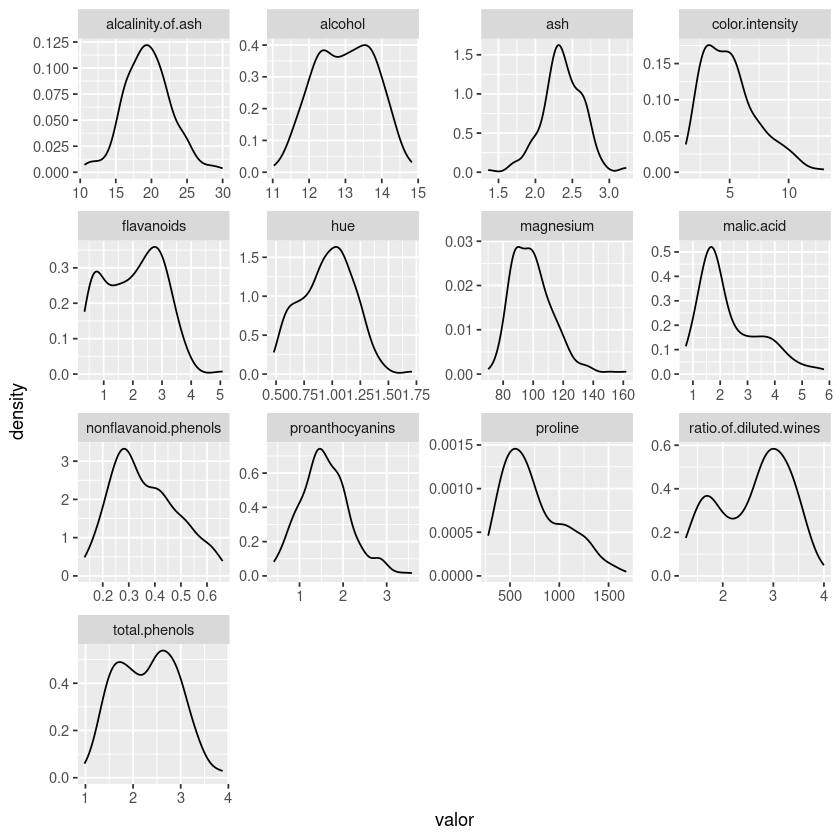

In [9]:
ggplot(longTabelaWine, aes(x = valor), fill = "class") +
    geom_density(alpha = 0.5) +
    facet_wrap(~variavel, scales = "free")

#talvez o "fill" nao seja necessario

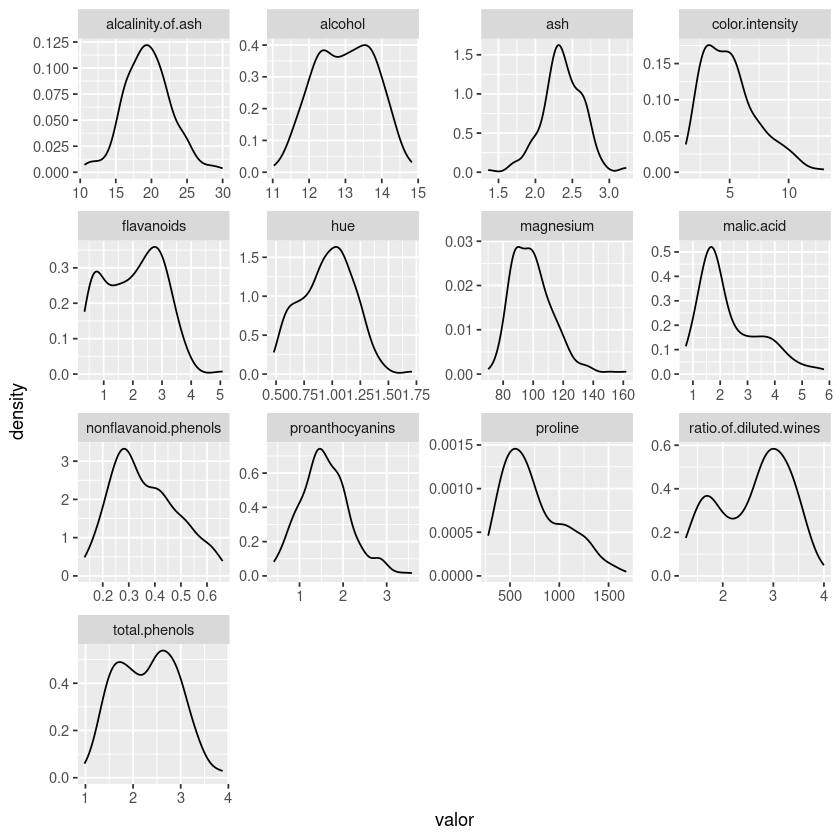

In [10]:
ggplot(longTabelaWine, aes(x = valor)) +
    geom_density(alpha = 0.5) +
    facet_wrap(~variavel, scales = "free")

## d)Apresente o gráfico de box-plot para cada atributo pelo tipo de vinho

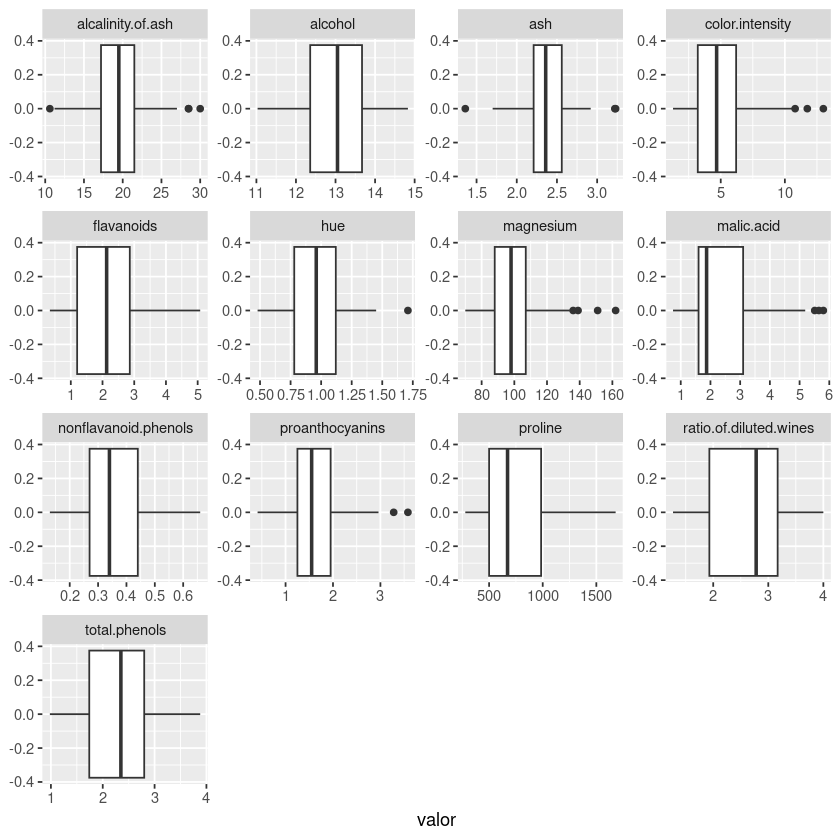

In [12]:
ggplot(longTabelaWine, aes(x = valor)) +
    geom_boxplot() +
    facet_wrap(~variavel, scales = "free")